In [20]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel('dataFrame.xlsx')
df

,price1,price2,price3,price4,price5,price6,price7,price8
0,1.09120,1.09119,1.09120,1.09118,1.09118,1.09117,1.09118,1.09119
1,1.09119,1.09120,1.09118,1.09118,1.09117,1.09118,1.09119,1.09119
2,1.09120,1.09118,1.09118,1.09117,1.09118,1.09119,1.09119,1.09120
3,1.09118,1.09118,1.09117,1.09118,1.09119,1.09119,1.09120,1.09128
4,1.09118,1.09117,1.09118,1.09119,1.09119,1.09120,1.09128,1.09123
5,1.09117,1.09118,1.09119,1.09119,1.09120,1.09128,1.09123,1.09119
6,1.09118,1.09119,1.09119,1.09120,1.09128,1.09123,1.09119,1.09125
7,1.09119,1.09119,1.09120,1.09128,1.09123,1.09119,1.09125,1.09125
8,1.09119,1.09120,1.09128,1.09123,1.09119,1.09125,1.09125,1.09125
9,1.09120,1.09128,1.09123,1.09119,1.09125,1.09125,1.09125,1.09124


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2)
x_train.shape

(40, 7)

In [30]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(7, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2023-05-16 10:32:10.443471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 10:32:10.447569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 10:32:10.449769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [31]:
# Melatih model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100


2023-05-16 10:32:14.001558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 10:32:14.006856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 10:32:14.010994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 - 2s - loss: 1.4650 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 1.0230 - 19ms/epoch - 10ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6660 - 24ms/epoch - 12ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3782 - 24ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1597 - 33ms/epoch - 16ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0281 - 25ms/epoch - 12ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0096 - 27ms/epoch - 14ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0764 - 35ms/epoch - 17ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1061 - 28ms/epoch - 14ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0692 - 30ms/epoch - 15ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0237 - 29ms/epoch - 15ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0021 - 27ms/epoch - 13ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0024 - 33ms/epoch - 17ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0117 - 25ms/epoch - 13ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0198 - 23ms/epoch - 11ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0225 - 24ms/epoch - 12ms/step
Epoch 17/100
2/2 - 0s - loss: 0.0

In [32]:
# melakukan prediksi harga saham pada data uji
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 410ms/step


2023-05-16 10:32:27.035337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-16 10:32:27.036843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-16 10:32:27.038112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [33]:
len(predictions)
x_time = [x for x in range(len(predictions))]

In [27]:
len(y_test)

10

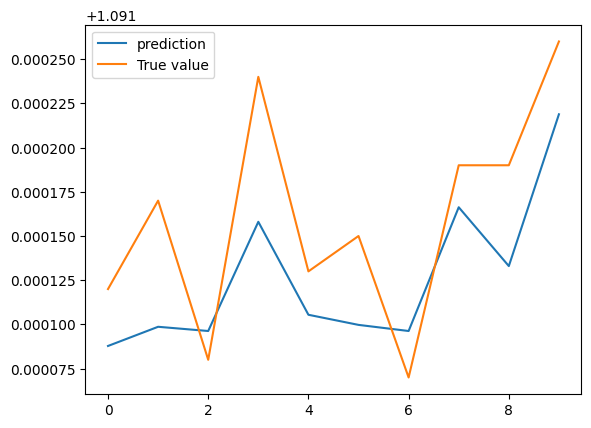

In [34]:
plt.plot(x_time, predictions, label="prediction")
plt.plot(x_time, y_test, label="True value")
plt.legend()
plt.show()